In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install numpy

In [5]:
!pip install --upgrade setuptools

  Obtaining dependency information for setuptools from https://files.pythonhosted.org/packages/c0/7a/3da654f49c95d0cc6e9549a855b5818e66a917e852ec608e77550c8dc08b/setuptools-69.1.1-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/819.3 kB ? eta -:--:--
   ---------------------------------------- 10.2/819.3 kB ? eta -:--:--
   - ------------------------------------- 30.7/819.3 kB 445.2 kB/s eta 0:00:02
   -- ------------------------------------ 61.4/819.3 kB 550.5 kB/s eta 0:00:02
   ----- -------------------------------- 122.9/819.3 kB 804.6 kB/s eta 0:00:01
   -------- ----------------------------- 174.1/819.3 kB 876.1 kB/s eta 0:00:01
   ----------- ---------------------------- 245.8/819.3 kB 1.1 MB/s eta 0:00:01
   ------------ ------------------------- 276.5/819.3 kB 947.5 kB/s eta 0:00:01
   ---------------- ----------------------- 337.9/819.3 kB 1.1 MB/s eta 0:00:01
   -----------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.75 requires requests_mock, which is not installed.
conda-repo-cli 1.0.75 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.75 requires PyYAML==6.0.1, but you have pyyaml 6.0 which is incompatible.


In [4]:
!pip install google-colab

  Using cached google-colab-1.0.0.tar.gz (72 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached google_auth-1.4.2-py2.py3-none-any.whl (64 kB)
  Using cached ipykernel-4.6.1-py3-none-any.whl (104 kB)
  Using cached ipython-5.5.0-py3-none-any.whl (758 kB)
  Using cached notebook-5.2.2-py2.py3-none-any.whl (8.0 MB)
  Using cached six-1.12.0-py2.py3-none-any.whl (10 kB)
  Using cached pandas-0.24.2.tar.gz (11.8 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py egg_info did not run successfully.
  exit code: 1
  
  [15 lines of output]
  C:\Users\user\AppData\Local\Temp\pip-install-lnvjgge7\pandas_6a184f0865c1422ea8c7010655868ab2\setup.py:12: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
    import pkg_resources
  C:\Users\user\anaconda3\Lib\site-packages\setuptools\__init__.py:84: _DeprecatedInstaller: setuptools.installer and fetch_build_eggs are deprecated.
  !!
  
          ********************************************************************************
          Requirements should be satisfied by a PEP 517 installer.
          If you are using pip, you can try `pip install --use-pep517`.
          ********************************************************************************
  
  !!
    dist.fetch_build_eggs(dist.setup_requires)
  error in pandas setup command: 'install_requires' must be a string or list 

In [12]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google.colab'

In [3]:
import io
# Read the data file
CC_data = pd.read_csv(io.BytesIO(uploaded['CC_data.csv']))

## 1. Data Understanding

In [4]:
# Replace "?" with NaN
CC_data.replace('?', np.NaN, inplace = True)
# Convert Age to numeric
CC_data["Age"] = pd.to_numeric(CC_data["Age"])
# CC_data2 = CC_data[:,:]
CC_data2 = CC_data.copy()

In [ ]:
CC_data.describe()

,Age,Debt,YearsEmployed,CreditScore,ZipCode,Income,Probs,Class
count,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000
mean,31.568171,4.758725,2.223406,2.40000,180.547826,1017.385507,0.563677,0.501449
std,11.853273,4.978163,3.346513,4.86294,173.970323,5210.102598,0.357035,0.500361
min,13.750000,0.000000,0.000000,0.00000,0.000000,0.000000,0.070457,0.000000
25%,22.670000,1.000000,0.165000,0.00000,60.000000,0.000000,0.156711,0.000000
50%,28.625000,2.750000,1.000000,0.00000,160.000000,5.000000,0.503380,1.000000
75%,37.707500,7.207500,2.625000,3.00000,272.000000,395.500000,0.942525,1.000000
max,80.250000,28.000000,28.500000,67.00000,2000.000000,100000.000000,0.972806,1.000000


In [ ]:
CC_data.isnull().sum()

Male              12
Age               12
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

## 2. Data Preparation

In [5]:
# Imputing missing values for numerical columns with mean value
CC_data.fillna(CC_data.mean(), inplace=True)

In [6]:
CC_data.tail(10)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
680,b,19.50,0.290,u,g,k,v,0.290,f,f,0,f,g,280,364,-
681,b,27.83,1.000,y,p,d,h,3.000,f,f,0,f,g,176,537,-
682,b,17.08,3.290,u,g,i,v,0.335,f,f,0,t,g,140,2,-
683,b,36.42,0.750,y,p,d,v,0.585,f,f,0,f,g,240,3,-
684,b,40.58,3.290,u,g,m,v,3.500,f,f,0,t,s,400,0,-
685,b,21.08,10.085,y,p,e,h,1.250,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.000,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.000,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.040,f,f,0,f,g,280,750,-
689,b,35.00,3.375,u,g,c,h,8.290,f,f,0,t,g,0,0,-


In [7]:
CC_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            678 non-null    object 
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         684 non-null    object 
 4   BankCustomer    684 non-null    object 
 5   EducationLevel  681 non-null    object 
 6   Ethnicity       681 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         677 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory usage: 86.4+ KB


## 3. Data description and distribution

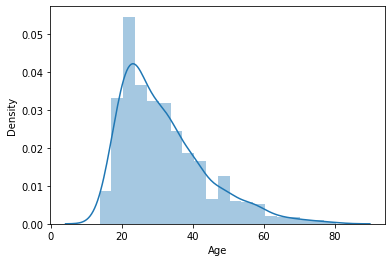

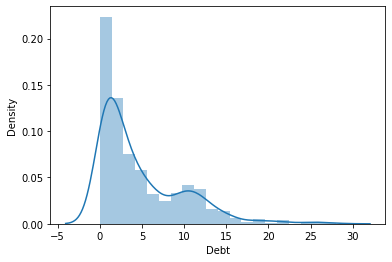

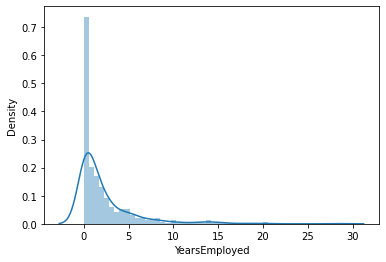

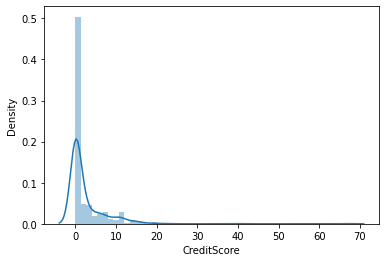

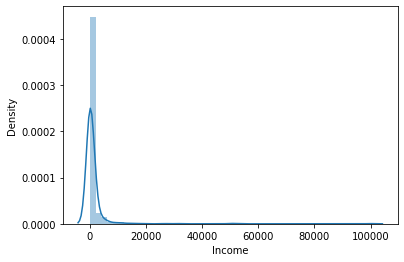

In [8]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(CC_data['Age'])
plotDistPlot(CC_data['Debt'])
plotDistPlot(CC_data['YearsEmployed'])
plotDistPlot(CC_data['CreditScore'])
plotDistPlot(CC_data['Income'])

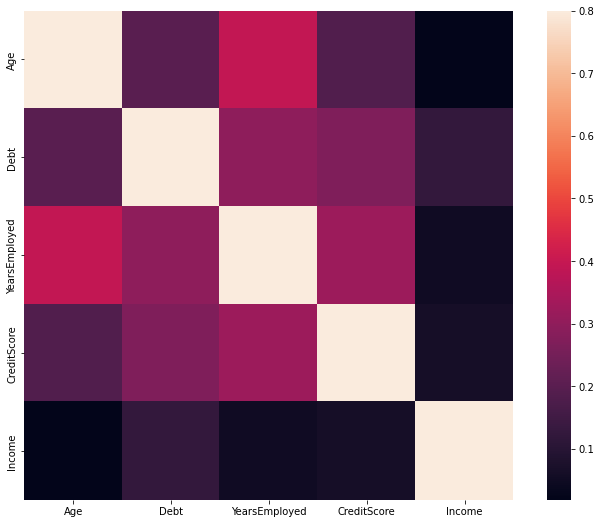

In [ ]:
#correlation matrix
corrmat = CC_data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

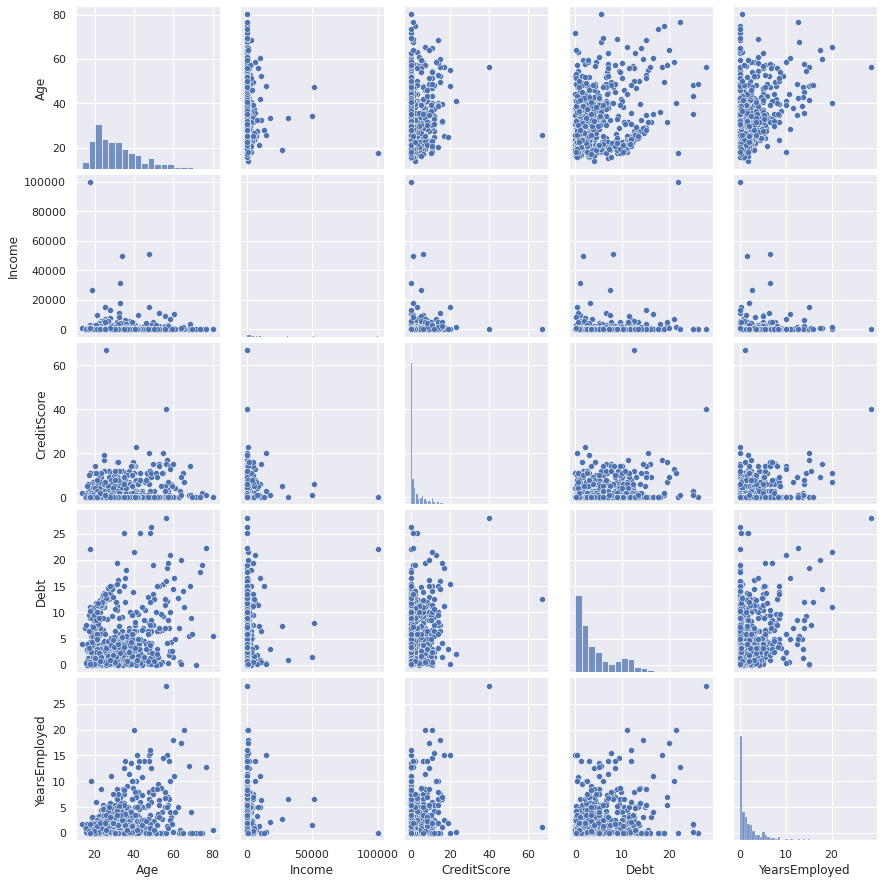

In [ ]:
#scatterplot
sns.set()
cols = ['Age', 'Income', 'CreditScore', 'Debt', 'YearsEmployed']
sns.pairplot(CC_data[cols], size = 2.5)
plt.show();

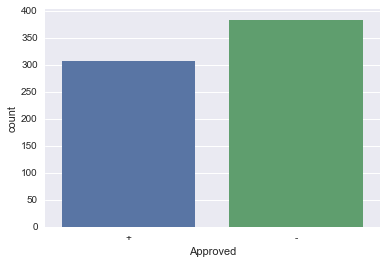

In [ ]:
sns.countplot(data = CC_data, x = 'Approved')

In [ ]:
CC_data.isnull().sum()

Male              12
Age                0
Debt               0
Married            6
BankCustomer       6
EducationLevel     9
Ethnicity          9
YearsEmployed      0
PriorDefault       0
Employed           0
CreditScore        0
DriversLicense     0
Citizen            0
ZipCode           13
Income             0
Approved           0
dtype: int64

In [ ]:
print("shape of the data:", CC_data.shape)

shape of the data: (690, 16)


In [ ]:
def imputeWithMode(df):
    """ 
    Going through each columns and checking the type is object
    if it is object, impute it with most frequent value
    """
    for col in df:
        if df[col].dtypes == 'object':
            df[col] = df[col].fillna(df[col].mode().iloc[0])
imputeWithMode(CC_data)

In [ ]:
CC_data.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [ ]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# # Looping for each object type column
#Using label encoder to convert into numeric types
for col in CC_data:
    if CC_data[col].dtypes=='object':
        CC_data[col]=le.fit_transform(CC_data[col])

In [10]:
CC_data.tail(15)

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
675,0,41.58,1.040,1,0,0,7,0.665,0,0,0,0,0,61,237,1
676,0,30.58,10.665,1,0,10,3,0.085,0,1,12,1,0,11,3,1
677,1,19.42,7.250,1,0,9,7,0.040,0,1,1,0,0,1,1,1
678,0,17.92,10.210,1,0,5,2,0.000,0,0,0,0,0,0,50,1
679,0,20.08,1.250,1,0,1,7,0.000,0,0,0,0,0,0,0,1
680,1,19.50,0.290,1,0,8,7,0.290,0,0,0,0,0,74,364,1
681,1,27.83,1.000,2,2,3,3,3.000,0,0,0,0,0,32,537,1
682,1,17.08,3.290,1,0,6,7,0.335,0,0,0,1,0,15,2,1
683,1,36.42,0.750,2,2,3,7,0.585,0,0,0,0,0,61,3,1
684,1,40.58,3.290,1,0,9,7,3.500,0,0,0,1,2,111,0,1


## 4. Data Modeling and Evaluation

In [11]:
from sklearn.model_selection import train_test_split
# Removing the feature which are not important and converting to NumPy array
CC_data = CC_data.drop(['DriversLicense', 'ZipCode'], axis=1)
CC_data = CC_data.values

In [12]:
# Creating new variable to input features and labels
X,y = CC_data[:,0:13] , CC_data[:,13]

# Spliting the data into training and testing sets
X_train, X_test, y_train, Y_test = train_test_split(X,
                                y,
                                test_size=0.2,
                                random_state=123)

In [13]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Scaling X_train and X_test
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

In [14]:
rescaledX = scaler.transform(X)

In [19]:
#from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
rf = SGDClassifier(max_iter=1000, tol=1e-3) #RandomForestClassifier(n_estimators=500)
rf.fit(rescaledX_train, y_train)
y_pred = rf.predict(rescaledX_test)
print("Linear classifier has accuracy of: ", rf.score(rescaledX_test, Y_test))
# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Linear classifier has accuracy of:  0.8623188405797102


array([[55,  7],
       [12, 64]])

According to the Random Forest Classifier, PriorDefault is the most important feature, followed by Credit Score and Employment status.

Feature ranking:
1. feature 8 (0.297957)
2. feature 10 (0.111076)
3. feature 7 (0.108359)
4. feature 2 (0.102137)
5. feature 12 (0.089923)
6. feature 1 (0.086830)
7. feature 9 (0.062998)
8. feature 5 (0.062329)
9. feature 6 (0.029830)
10. feature 0 (0.014873)
11. feature 3 (0.011784)
12. feature 11 (0.011756)
13. feature 4 (0.010150)


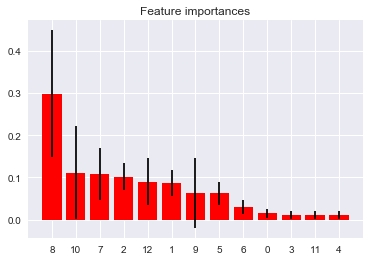

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## Which attribute has played most important role in credit card request decision?

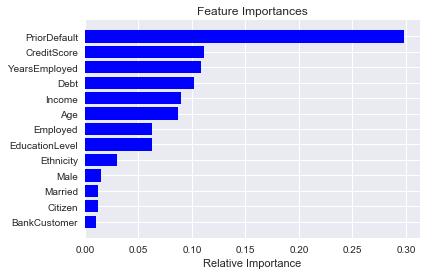

In [ ]:
# copy of CC_data is in CC_data2
CC_data2 = CC_data2.drop(['Approved'], axis=1)

features = CC_data2.columns
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Fitting logistic regression with default parameter values
logreg = LogisticRegression()
logreg.fit(rescaledX_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix

# Using the trained model to predict instances from the test set
y_pred = logreg.predict(rescaledX_test)

# Getting the accuracy score of predictive model
print("Logistic regression classifier has accuracy of: ", logreg.score(rescaledX_test, Y_test))

# Evaluate the confusion_matrix
confusion_matrix(Y_test, y_pred)

Logistic regression classifier has accuracy of:  0.8695652173913043


array([[54,  8],
       [10, 66]])

In [ ]:
y_probs = logreg.predict_proba(rescaledX)
y_class = logreg.predict(rescaledX)

In [ ]:
y_probs = np.delete(y_probs, 0, 1)

In [ ]:
# 0 is +, 1 is -
CC_data["Probs"] = np.ravel(y_probs).tolist()
CC_data["Class"] = np.ravel(y_class).tolist()

In [ ]:
CC_data.to_csv("CC_data.csv", index = False)

In [ ]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100, 150, 200]

# Create a dictionary
param_grid = dict(tol=tol, max_iter=max_iter)

In [ ]:
# Initializing GridSearchCV
grid_model = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=5)

# Rescaling the entire data set with all the predictive features
rescaledX = scaler.fit_transform(X)

# Calculating and summarizing the final results
grid_model_result = grid_model.fit(rescaledX, y)
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_ 
print("Best: %f using %s" %  (best_score, best_params))

Best: 0.852174 using {'max_iter': 100, 'tol': 0.01}
